In [1]:
import os, shutil, pathlib

original_dir = pathlib.Path("C:/Users/ASUS/Documents/AAIML/Foundations of Machine Learning Frameworks/Data/kaggle_dogs_vs_cats/train/train")
new_base_dir = pathlib.Path("C:/Users/ASUS/Documents/AAIML/Foundations of Machine Learning Frameworks/Data/kaggle_dogs_vs_cats_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=2000)
make_subset("validation", start_index=2000, end_index=3000)
make_subset("test", start_index=3000, end_index=5000)

## Step 1: Obtain the Data

In [2]:
from tensorflow.keras.utils import image_dataset_from_directory
import pathlib
import os

# Define paths for the dataset
base_dir = pathlib.Path('C:/Users/ASUS/Documents/AAIML/Foundations of Machine Learning Frameworks/Data/kaggle_dogs_vs_cats_small')

# Load datasets
train_dataset = image_dataset_from_directory(
    base_dir / 'train',
    image_size=(180, 180),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    base_dir / 'validation',
    image_size=(180, 180),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    base_dir / 'test',
    image_size=(180, 180),
    batch_size=32)

Found 4000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.


## Step 2: Exploratory Data Analysis (EDA)

Class names: ['cat', 'dog']


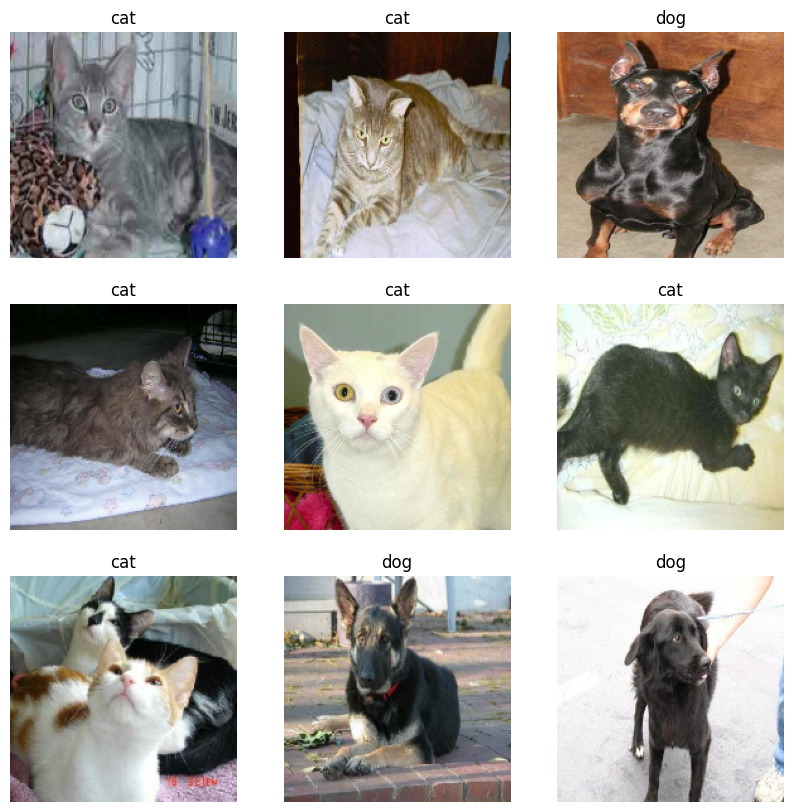

In [3]:
import matplotlib.pyplot as plt

class_names = train_dataset.class_names
print("Class names:", class_names)

# Visualize some samples
def visualize_samples(dataset):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

visualize_samples(train_dataset)

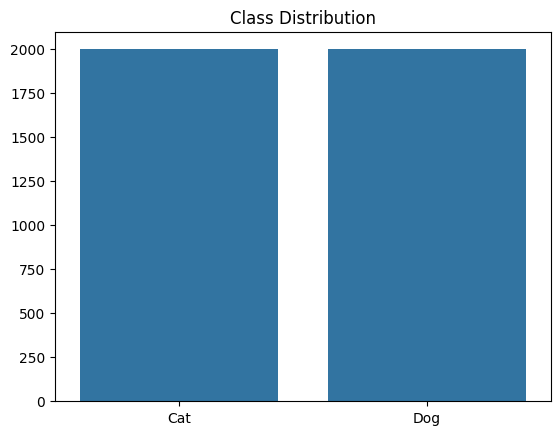

In [4]:
import numpy as np
import seaborn as sns
# Checking class balance
class_counts = [0, 0]
for _, labels in train_dataset:
    class_counts[0] += np.sum(labels == 0)
    class_counts[1] += np.sum(labels == 1)

sns.barplot(x=["Cat", "Dog"], y=class_counts)
plt.title("Class Distribution")
plt.show()

In [5]:
# Display dataset info
print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(validation_dataset))
print("Test dataset size:", len(test_dataset))

Train dataset size: 125
Validation dataset size: 63
Test dataset size: 125


## Step 3.1: Define and Train a Vanilla CNN

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

# Define a custom CNN model
vanilla_cnn = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

vanilla_cnn.summary()

c:\Users\ASUS\Documents\AAIML\Foundations of Machine Learning Frameworks\CSCN8010\venv\tensorflow_cpu\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,308,673 (100.36 MB)

 Trainable params: 26,308,673 (100.36 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compile the model
vanilla_cnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [8]:
# Train the model
vanilla_callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/vanilla_cnn_best.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

vanilla_history = vanilla_cnn.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=vanilla_callbacks
)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 61s 480ms/step - accuracy: 0.5046 - loss: 104.0751 - val_accuracy: 0.5365 - val_loss: 0.6920
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 54s 434ms/step - accuracy: 0.6077 - loss: 0.6606 - val_accuracy: 0.5435 - val_loss: 0.7135
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 55s 437ms/step - accuracy: 0.6615 - loss: 0.5906 - val_accuracy: 0.5670 - val_loss: 0.7775
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 54s 433ms/step - accuracy: 0.7373 - loss: 0.4813 - val_accuracy: 0.5580 - val_loss: 1.0255
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 54s 435ms/step - accuracy: 0.8085 - loss: 0.3942 - val_accuracy: 0.5845 - val_loss: 1.1618
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 55s 440ms/step - accuracy: 0.8826 - loss: 0.2858 - val_accuracy: 0.5740 - val_loss: 1.4616
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 54s 435ms/step - accuracy: 0.9066 - loss: 0.2006 - val_accuracy: 0.5780 - val_loss: 1.6727
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 54s 435ms/step - accuracy: 0.9553 - loss:

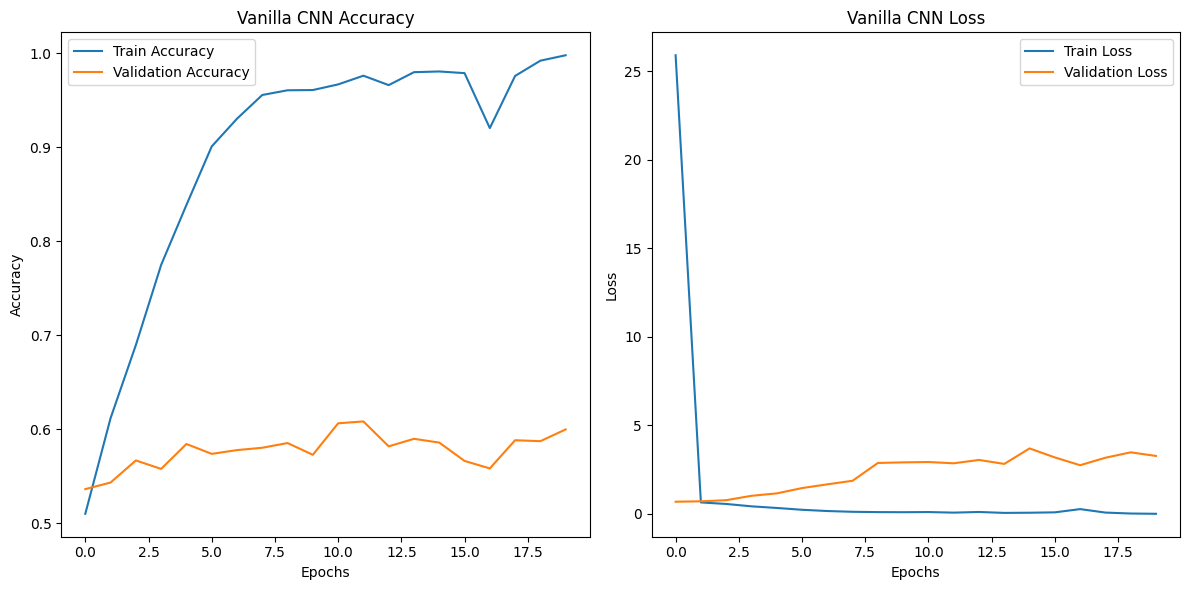

In [9]:
# Plot training and validation accuracy/loss for Vanilla CNN
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(vanilla_history.history['accuracy'], label='Train Accuracy')
plt.plot(vanilla_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Vanilla CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(vanilla_history.history['loss'], label='Train Loss')
plt.plot(vanilla_history.history['val_loss'], label='Validation Loss')
plt.title('Vanilla CNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Step 3.2: Fine-Tune VGG16

In [10]:
from tensorflow.keras.applications import VGG16

# Load pre-trained VGG16 model
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
conv_base.trainable = False

# Define the model with VGG16 as a feature extractor
inputs = keras.Input(shape=(180, 180, 3))
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

vgg_model = keras.Model(inputs, outputs)

vgg_model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 180, 180,  │          0 │ input_layer_2[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 180, 180)  │          0 │ sequential_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 180, 180)  │          0 │ sequential_1[0][… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 180, 180)  │          0 │ sequential_1[0][… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 180, 180,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 180, 180,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 5, 5, 512) │ 14,714,688 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 12800)     │          0 │ vgg16[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │  3,277,056 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │        257 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 17,992,001 (68.63 MB)

 Trainable params: 3,277,313 (12.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [11]:
vgg_model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [12]:
# Train the model
vgg_callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/vgg16_finetuned_best.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

vgg_history = vgg_model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=vgg_callbacks
)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.8487 - loss: 1.8305 - val_accuracy: 0.9635 - val_loss: 0.3442
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.9404 - loss: 0.6255 - val_accuracy: 0.9725 - val_loss: 0.2579
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.9514 - loss: 0.3670 - val_accuracy: 0.9730 - val_loss: 0.2276
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 298s 2s/step - accuracy: 0.9609 - loss: 0.3148 - val_accuracy: 0.9765 - val_loss: 0.2104
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.9647 - loss: 0.2263 - val_accuracy: 0.9755 - val_loss: 0.1778
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 293s 2s/step - accuracy: 0.9631 - loss: 0.2251 - val_accuracy: 0.9740 - val_loss: 0.1952
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.9739 - loss: 0.1614 - val_accuracy: 0.9775 - val_loss: 0.1707
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 298s 2s/step - accuracy: 0.9716 - loss: 0.1533 - val_accu

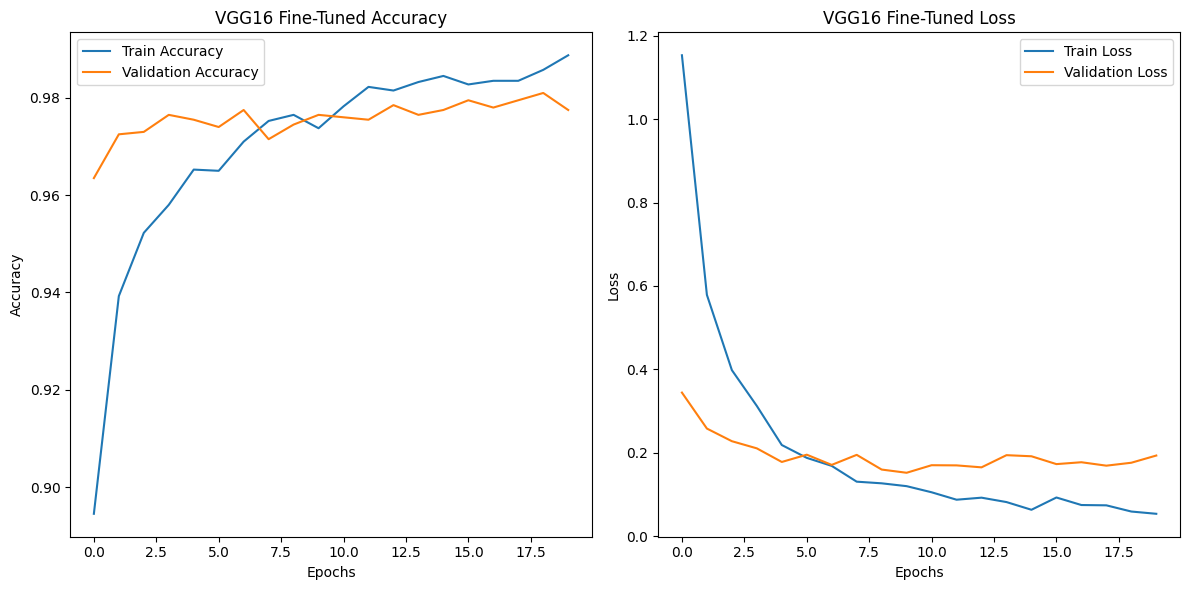

In [13]:
# Plot training and validation accuracy/loss for Fine-Tuned VGG16
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(vgg_history.history['accuracy'], label='Train Accuracy')
plt.plot(vgg_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16 Fine-Tuned Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(vgg_history.history['loss'], label='Train Loss')
plt.plot(vgg_history.history['val_loss'], label='Validation Loss')
plt.title('VGG16 Fine-Tuned Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Step 5: Evaluate Models

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc
import seaborn as sns
import numpy as np

# Load best models
best_vanilla_cnn = keras.models.load_model("./models/vanilla_cnn_best.keras")
best_vgg16 = keras.models.load_model("./models/vgg16_finetuned_best.keras")

# Evaluate on test dataset
vanilla_test_loss, vanilla_test_acc = best_vanilla_cnn.evaluate(test_dataset)
vgg_test_loss, vgg_test_acc = best_vgg16.evaluate(test_dataset)

print(f"Vanilla CNN Test Accuracy: {vanilla_test_acc:.3f}")
print(f"Fine-Tuned VGG16 Test Accuracy: {vgg_test_acc:.3f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.5353 - loss: 0.6886
125/125 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.9811 - loss: 0.2306
Vanilla CNN Test Accuracy: 0.541
Fine-Tuned VGG16 Test Accuracy: 0.978


In [15]:
# Get predictions and true labels
def get_predictions_and_labels(model, dataset):
    y_true = []
    y_pred = []
    for images, labels in dataset:
        preds = model.predict(images)
        y_true.extend(labels.numpy())
        y_pred.extend(preds)
    return np.array(y_true), np.array(y_pred)

vanilla_y_true, vanilla_y_pred = get_predictions_and_labels(best_vanilla_cnn, test_dataset)
vgg_y_true, vgg_y_pred = get_predictions_and_labels(best_vgg16, test_dataset)

# Threshold predictions
vanilla_y_pred_binary = (vanilla_y_pred > 0.5).astype(int)
vgg_y_pred_binary = (vgg_y_pred > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━

In [16]:
# Confusion matrix and classification report
print("Vanilla CNN Classification Report:")
print(classification_report(vanilla_y_true, vanilla_y_pred_binary))

print("VGG16 Classification Report:")
print(classification_report(vgg_y_true, vgg_y_pred_binary))

Vanilla CNN Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.43      0.48      2000
           1       0.53      0.65      0.59      2000

    accuracy                           0.54      4000
   macro avg       0.54      0.54      0.54      4000
weighted avg       0.54      0.54      0.54      4000

VGG16 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2000
           1       0.98      0.98      0.98      2000

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000



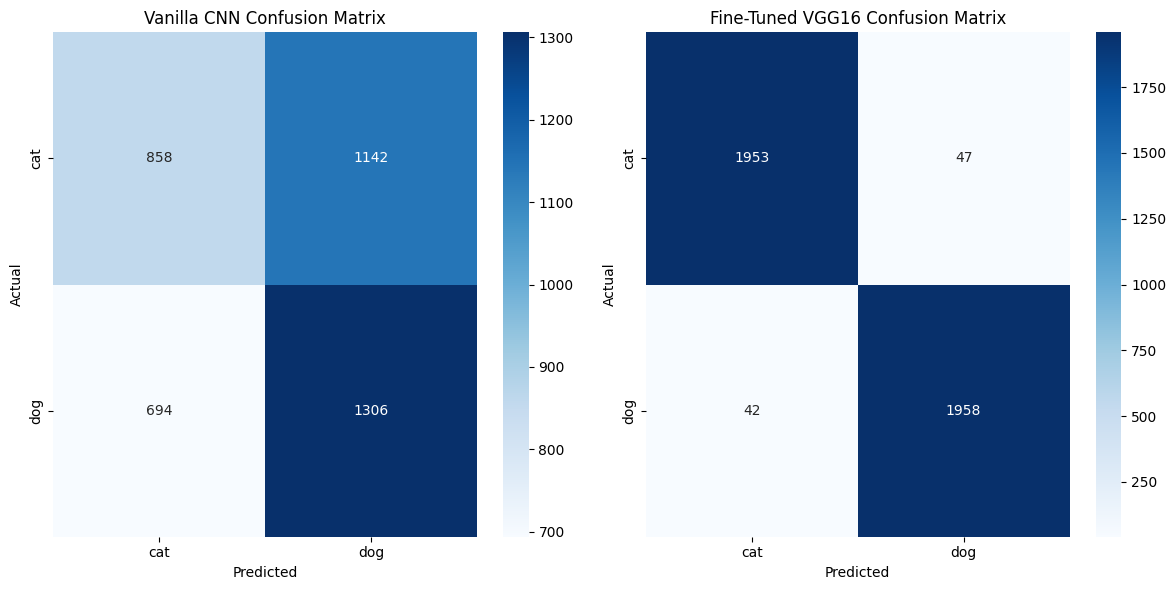

In [17]:
# Plot confusion matrices
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
vanilla_cm = confusion_matrix(vanilla_y_true, vanilla_y_pred_binary)
sns.heatmap(vanilla_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Vanilla CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
vgg_cm = confusion_matrix(vgg_y_true, vgg_y_pred_binary)
sns.heatmap(vgg_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Fine-Tuned VGG16 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

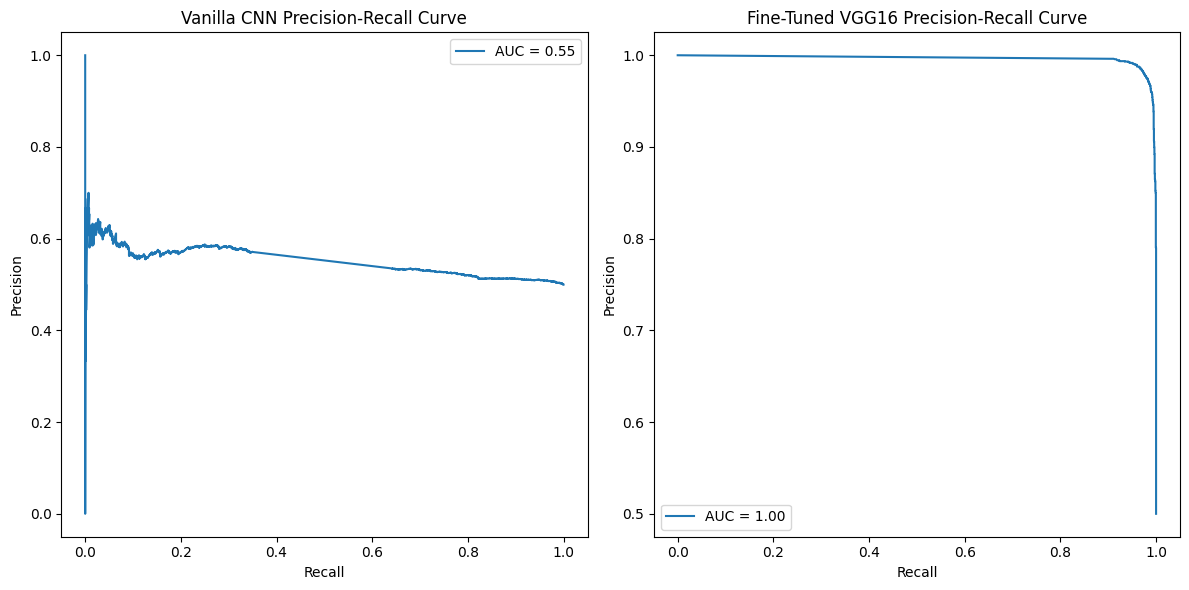

In [18]:
# Precision-Recall Curves
plt.figure(figsize=(12, 6))

# Vanilla CNN PR Curve
vanilla_precision, vanilla_recall, _ = precision_recall_curve(vanilla_y_true, vanilla_y_pred)
vanilla_auc = auc(vanilla_recall, vanilla_precision)
plt.subplot(1, 2, 1)
plt.plot(vanilla_recall, vanilla_precision, label=f'AUC = {vanilla_auc:.2f}')
plt.title('Vanilla CNN Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

# VGG16 PR Curve
vgg_precision, vgg_recall, _ = precision_recall_curve(vgg_y_true, vgg_y_pred)
vgg_auc = auc(vgg_recall, vgg_precision)
plt.subplot(1, 2, 2)
plt.plot(vgg_recall, vgg_precision, label=f'AUC = {vgg_auc:.2f}')
plt.title('Fine-Tuned VGG16 Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()

Vanilla CNN Failure Cases:


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7508\2570064252.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"True: {class_names[int(y_true[idx])]}, Pred: {class_names[int(y_pred[idx])]}")


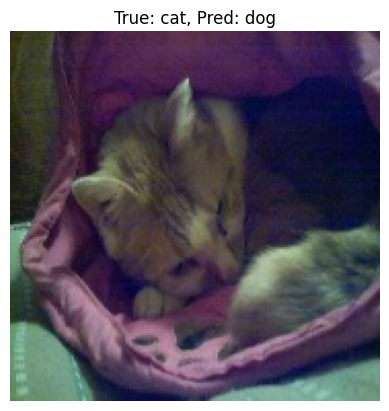

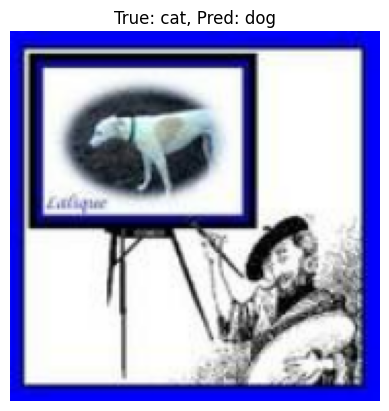

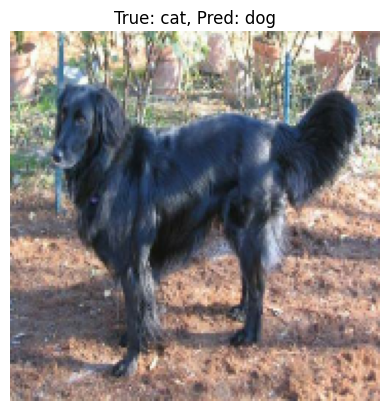

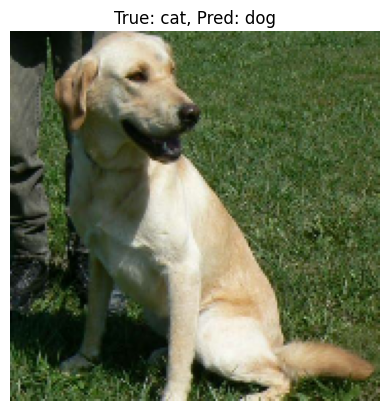

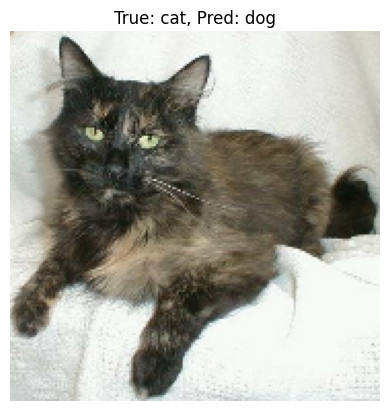

Fine-Tuned VGG16 Failure Cases:


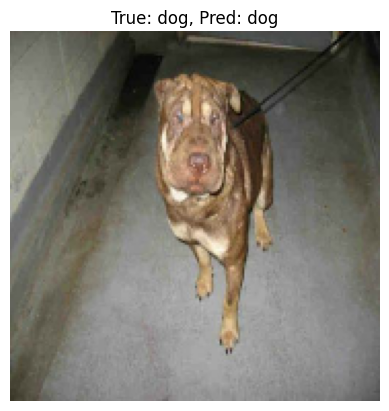

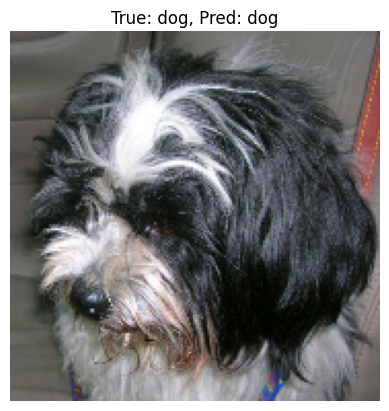

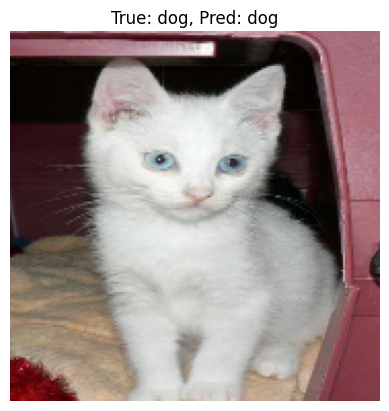

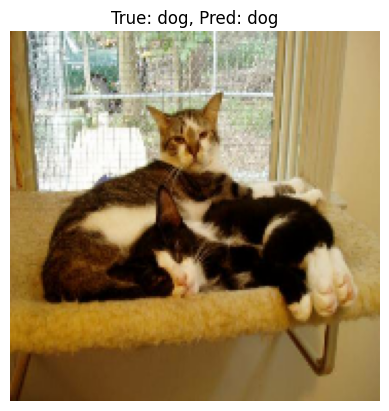

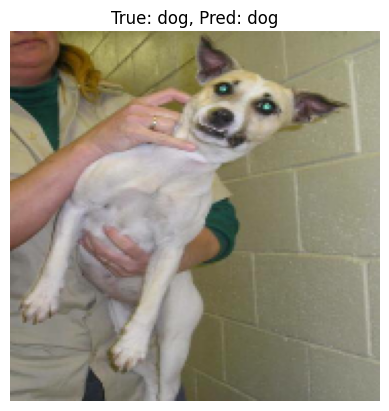

In [19]:
## Step 6: Analyze Failure Cases
# Identify failure cases
def analyze_failures(y_true, y_pred, dataset):
    incorrect_indices = np.where(y_true != y_pred)[0]
    for idx in incorrect_indices[:5]:
        for batch_images, batch_labels in dataset.take(1):
            plt.imshow(batch_images[idx].numpy().astype("uint8"))
            plt.title(f"True: {class_names[int(y_true[idx])]}, Pred: {class_names[int(y_pred[idx])]}")
            plt.axis("off")
            plt.show()

print("Vanilla CNN Failure Cases:")
analyze_failures(vanilla_y_true, vanilla_y_pred_binary, test_dataset)

print("Fine-Tuned VGG16 Failure Cases:")
analyze_failures(vgg_y_true, vgg_y_pred_binary, test_dataset)


Vanilla CNN: 8000000 misclassified examples out of 4000


TypeError: Invalid shape (32, 180, 180, 3) for image data

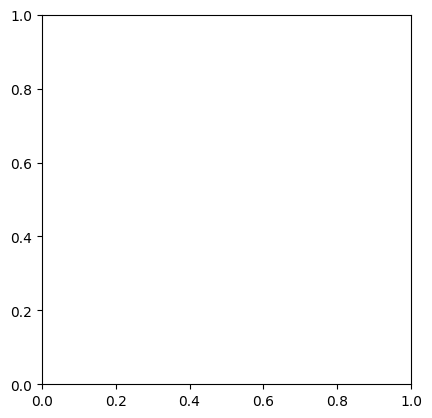

In [20]:
# Explore Misclassified Examples
def show_misclassified_images(dataset, true_labels, predicted_labels, model_name):
    misclassified_indices = np.where(true_labels != predicted_labels)[0]
    print(f"\n{model_name}: {len(misclassified_indices)} misclassified examples out of {len(true_labels)}")

    for idx in misclassified_indices[:5]:  # Show up to 5 misclassified examples
        image, true_label = dataset[idx]
        predicted_label = predicted_labels[idx]
        plt.imshow(image.numpy().astype("uint8"))
        plt.title(f"True: {class_names[true_label]}, Pred: {class_names[predicted_label]}")
        plt.axis("off")
        plt.show()

# Note: Assuming test_dataset is a TensorFlow Dataset object
# Convert to NumPy for indexing (if necessary)

show_misclassified_images(list(test_dataset), vanilla_y_true, vanilla_y_pred_binary, "Vanilla CNN")
show_misclassified_images(list(test_dataset), vgg_y_true, vgg_y_pred_binary, "Fine-Tuned VGG16")